In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
brca = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Real%20Breast%20Cancer%20Data/BRCA.csv")

In [3]:
brca.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
brca.dropna(inplace = True)

In [5]:
brca.shape

(317, 16)

In [6]:
brca.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [7]:
print('The attributes of the dataset are:\n')
for txt in brca.columns:
    print('--', txt)

The attributes of the dataset are:

-- Patient_ID
-- Age
-- Gender
-- Protein1
-- Protein2
-- Protein3
-- Protein4
-- Tumour_Stage
-- Histology
-- ER status
-- PR status
-- HER2 status
-- Surgery_type
-- Date_of_Surgery
-- Date_of_Last_Visit
-- Patient_Status


In [8]:
gen = (
    brca
    .groupby('Gender', as_index = False)
    .agg(Total = ('Age', 'count'))
)
gen['Percentage'] = (gen['Total']/gen['Total'].sum()) * 100
gen

,Gender,Total,Percentage
0,FEMALE,313,98.73817
1,MALE,4,1.26183


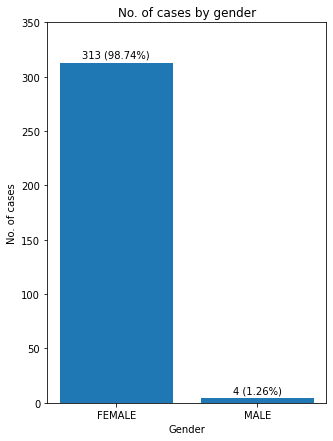

In [9]:
plt.figure(figsize = (5,7))
gen_bar = plt.bar(gen['Gender'], gen['Total'])
plt.yticks(np.arange(0,400,50))
plt.bar_label(gen_bar, labels = ['{} ({:.2f}%)'.format(t,p) for t,p in zip(gen['Total'],gen['Percentage'])], padding = 3)
plt.xlabel('Gender')
plt.ylabel('No. of cases')
plt.title('No. of cases by gender')
plt.show()

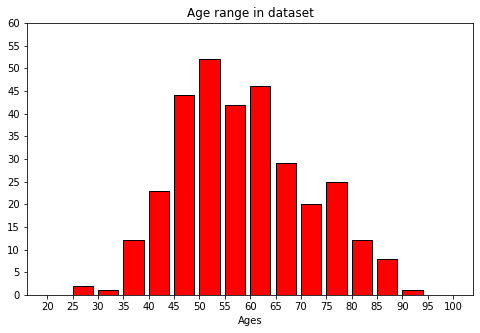

In [10]:
bins = list(range(20,105,5))

plt.figure(figsize = (8,5))
plt.hist(brca['Age'].astype(int), width = 4, align = 'mid', bins = bins, color = 'red', edgecolor = 'black')
plt.xticks(bins)
plt.xlabel('Ages')
plt.title('Age range in dataset')
plt.yticks(np.arange(0,65,5))
plt.show()

In [11]:
cancer_types_total = brca.groupby('Histology', as_index = False)['Age'].count()
cancer_types_total.rename(columns = {'Age': 'Total_Number'}, inplace = True)
totals_of_dataset = []
for hist, num in zip(cancer_types_total['Histology'], cancer_types_total['Total_Number']):
    answer = (num/brca.shape[0]) * 100
    totals_of_dataset.append(answer)
cancer_types_total['Percentage'] = totals_of_dataset
cancer_types_total

,Histology,Total_Number,Percentage
0,Infiltrating Ductal Carcinoma,224,70.662461
1,Infiltrating Lobular Carcinoma,81,25.552050
2,Mucinous Carcinoma,12,3.785489


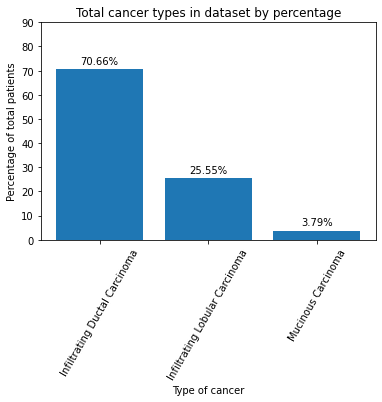

In [12]:
totals_bar = plt.bar(cancer_types_total['Histology'],cancer_types_total['Percentage'])
plt.xticks(rotation = 60)
plt.yticks(np.arange(0,100,10))
plt.xlabel('Type of cancer')
plt.ylabel('Percentage of total patients')
plt.title('Total cancer types in dataset by percentage')
plt.bar_label(totals_bar, labels = ['{:.2f}%'.format(t) for t in totals_bar.datavalues], padding = 3)
plt.show()

In [13]:
cancer_type_by_stage = (
    brca
    .groupby(['Histology', 'Tumour_Stage'], as_index = False)
    .agg(Total = ('Age', 'count'))
)
cancer_type_by_stage

,Histology,Tumour_Stage,Total
0,Infiltrating Ductal Carcinoma,I,47
1,Infiltrating Ductal Carcinoma,II,120
2,Infiltrating Ductal Carcinoma,III,57
3,Infiltrating Lobular Carcinoma,I,10
4,Infiltrating Lobular Carcinoma,II,51
5,Infiltrating Lobular Carcinoma,III,20
6,Mucinous Carcinoma,I,3
7,Mucinous Carcinoma,II,9


In [14]:
cancer_type_by_stage = cancer_type_by_stage.append({'Histology': 'Mucinous Carcinoma', 'Tumour_Stage':'III', 'Total':0}, ignore_index = True)
cancer_type_by_stage

,Histology,Tumour_Stage,Total
0,Infiltrating Ductal Carcinoma,I,47
1,Infiltrating Ductal Carcinoma,II,120
2,Infiltrating Ductal Carcinoma,III,57
3,Infiltrating Lobular Carcinoma,I,10
4,Infiltrating Lobular Carcinoma,II,51
5,Infiltrating Lobular Carcinoma,III,20
6,Mucinous Carcinoma,I,3
7,Mucinous Carcinoma,II,9
8,Mucinous Carcinoma,III,0


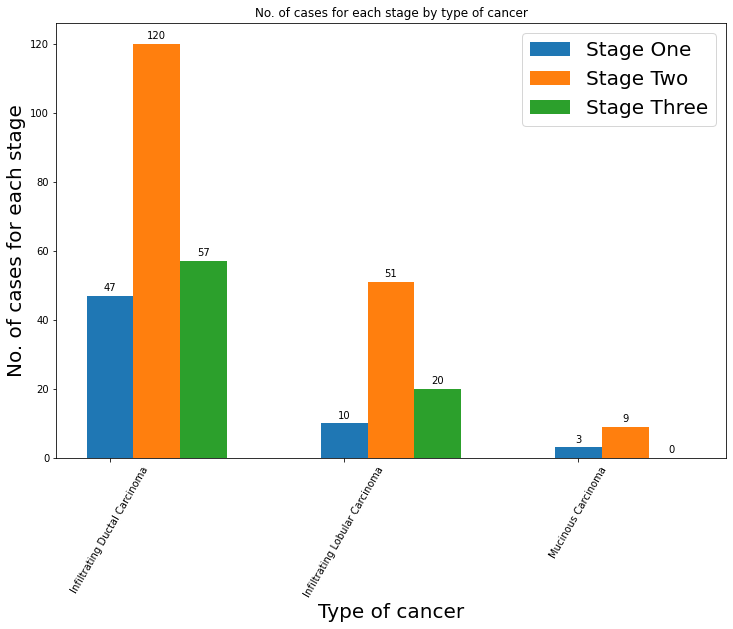

In [15]:
labels = list(cancer_type_by_stage['Histology'].unique())
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize = (12, 8))

plt1 = ax.bar(x, cancer_type_by_stage.loc[cancer_type_by_stage['Tumour_Stage'] == 'I', 'Total'], width = width, label = 'Stage One')
plt2 = ax.bar(x + width, cancer_type_by_stage.loc[cancer_type_by_stage['Tumour_Stage'] == 'II', 'Total'], width = width, label = 'Stage Two')
plt3 = ax.bar(x + width*2, cancer_type_by_stage.loc[cancer_type_by_stage['Tumour_Stage'] == 'III', 'Total'], width = width, label = 'Stage Three')

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.bar_label(plt1, padding = 3)
ax.bar_label(plt2, padding = 3)
ax.bar_label(plt3, padding = 3)

plt.xlabel('Type of cancer', fontdict = {'fontsize': 20})
plt.ylabel('No. of cases for each stage', fontdict = {'fontsize': 20})
plt.title('No. of cases for each stage by type of cancer')

plt.legend(prop={'size': 20})
plt.xticks(rotation = 60)


plt.show()

In [16]:
cancer_ages_raw = {}
key = 0
for i in range(len(bins)):
    if i < len(bins) - 1:
        row = brca.loc[(brca['Age'] >= bins[i]) & (brca['Age'] < bins[i + 1])][['Histology', 'Age']]
        if row.empty is False:
            cancer_ages_raw.update({'{} to {}'.format(bins[i], bins[i + 1]):row })
            key += 1
    else:
        pass

cancer_ages_list = []

for key, val in cancer_ages_raw.items():
    age_range = key
    hist = val.groupby('Histology', as_index = False).count()['Histology']
    age_count = val.groupby('Histology', as_index = False).count()['Age']
    hist_vals = {}
    
    for h, a in zip(hist, age_count):
        hist_vals.update({'Age_range': age_range, h:a})
        
    cancer_ages_list.append(hist_vals)

cancer_ages = pd.DataFrame(cancer_ages_list)

cancer_ages.fillna(0, inplace = True)
cols = ['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma','Mucinous Carcinoma']
for vla in cols:
    cancer_ages[vla] = cancer_ages[vla].astype(int)
cancer_ages.head()

,Age_range,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
0,25 to 30,1,1,0
1,30 to 35,1,0,0
2,35 to 40,7,4,1
3,40 to 45,12,10,1
4,45 to 50,30,12,2


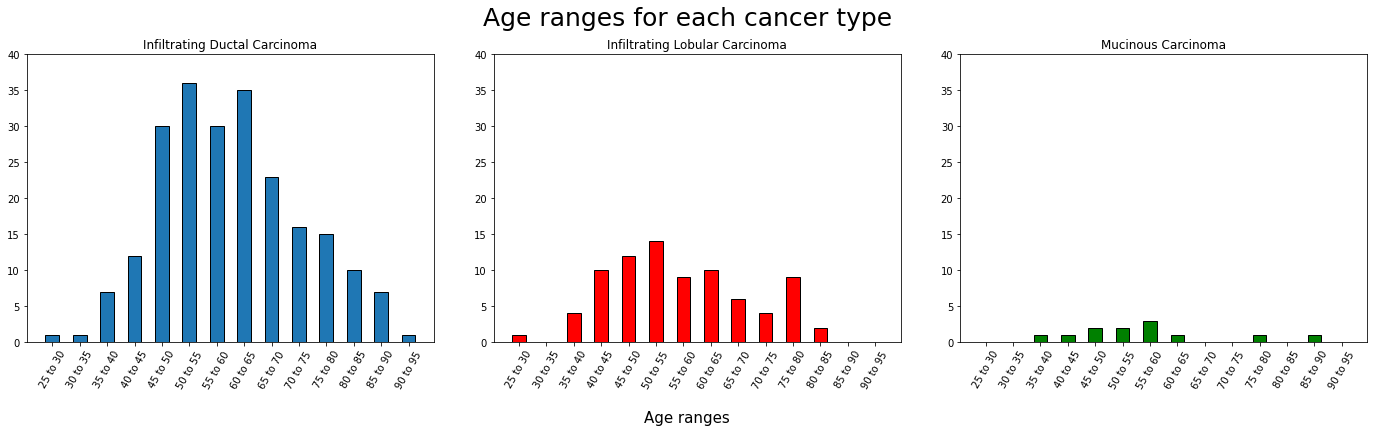

In [17]:
fig, axs = plt.subplots(1,3, figsize = (20,6))
axs[0].bar(cancer_ages['Age_range'], cancer_ages['Infiltrating Ductal Carcinoma'], width = 0.5, edgecolor = 'black')
axs[0].set_xticks(list(cancer_ages['Age_range']))
axs[0].set_xticklabels(list(cancer_ages['Age_range']), rotation = 60)
axs[0].set_yticks(range(0,45, 5))
axs[0].set_title('Infiltrating Ductal Carcinoma')

axs[1].bar(cancer_ages['Age_range'], cancer_ages['Infiltrating Lobular Carcinoma'], width = 0.5, edgecolor = 'black', color = 'red')
axs[1].set_xticks(list(cancer_ages['Age_range']))
axs[1].set_xticklabels(list(cancer_ages['Age_range']), rotation = 60)
axs[1].set_yticks(range(0,45, 5))
axs[1].set_title('Infiltrating Lobular Carcinoma')

axs[2].bar(cancer_ages['Age_range'], cancer_ages['Mucinous Carcinoma'], width = 0.5, edgecolor = 'black', color = 'green')
axs[2].set_xticks(list(cancer_ages['Age_range']))
axs[2].set_xticklabels(list(cancer_ages['Age_range']), rotation = 60)
axs[2].set_yticks(range(0,45, 5))
axs[2].set_title('Mucinous Carcinoma')

fig.tight_layout(pad = 4)
fig.supxlabel('Age ranges', fontsize = 15)
fig.suptitle('Age ranges for each cancer type', fontsize = 25)
plt.show()

In [18]:
protein_types = brca[['Protein1', 'Protein2', 'Protein3', 'Protein4']]
protein_types.head()

,Protein1,Protein2,Protein3,Protein4
0,0.080353,0.42638,0.54715,0.273680
1,-0.420320,0.57807,0.61447,-0.031505
2,0.213980,1.31140,-0.32747,-0.234260
3,0.345090,-0.21147,-0.19304,0.124270
4,0.221550,1.90680,0.52045,-0.311990


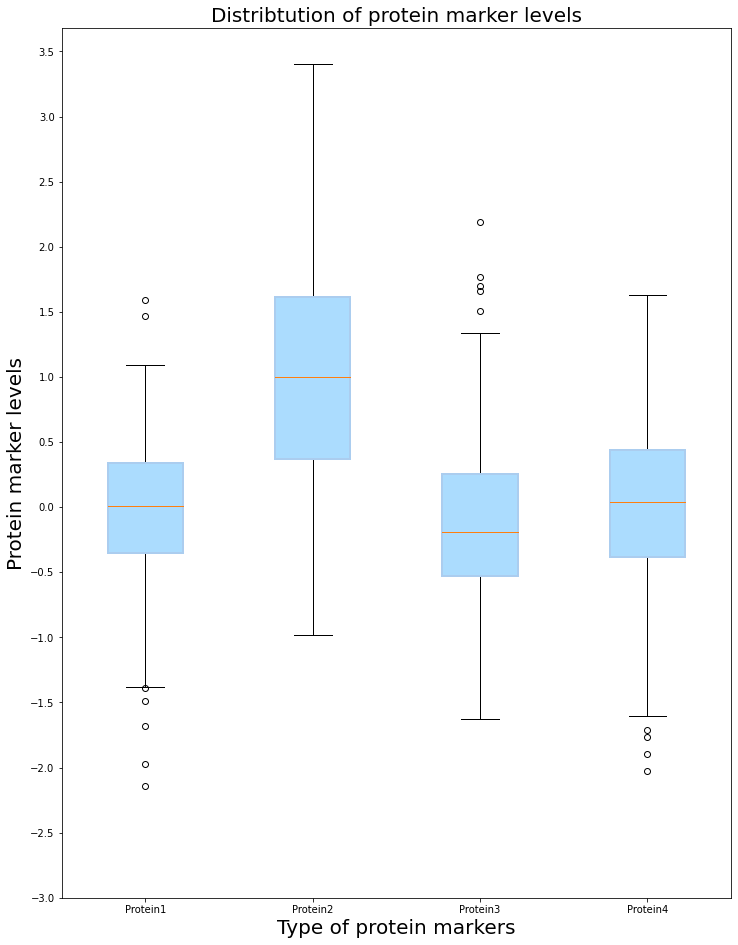

In [19]:
p_labels = protein_types.columns
plt.figure(figsize = (12, 16))

boxes = plt.boxplot([list(protein_types[ptype]) for ptype in protein_types], labels = p_labels, patch_artist = True)

for box in boxes['boxes']:
    box.set(color = '#abcdef', linewidth = 2)
    
    box.set(facecolor = '#abdcfe')

plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Type of protein markers', fontdict = {'fontsize': 20})
plt.ylabel('Protein marker levels', fontdict = {'fontsize': 20})
plt.title('Distribtution of protein marker levels', fontdict = {'fontsize': 20})

plt.show()

In [20]:
color_list = ['red','blue','green','orange']
p_labels = list(p_labels)
type_slices = brca[['Histology', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]
type_slices.head()

,Histology,Protein1,Protein2,Protein3,Protein4
0,Infiltrating Ductal Carcinoma,0.080353,0.42638,0.54715,0.273680
1,Mucinous Carcinoma,-0.420320,0.57807,0.61447,-0.031505
2,Infiltrating Ductal Carcinoma,0.213980,1.31140,-0.32747,-0.234260
3,Infiltrating Ductal Carcinoma,0.345090,-0.21147,-0.19304,0.124270
4,Infiltrating Ductal Carcinoma,0.221550,1.90680,0.52045,-0.311990


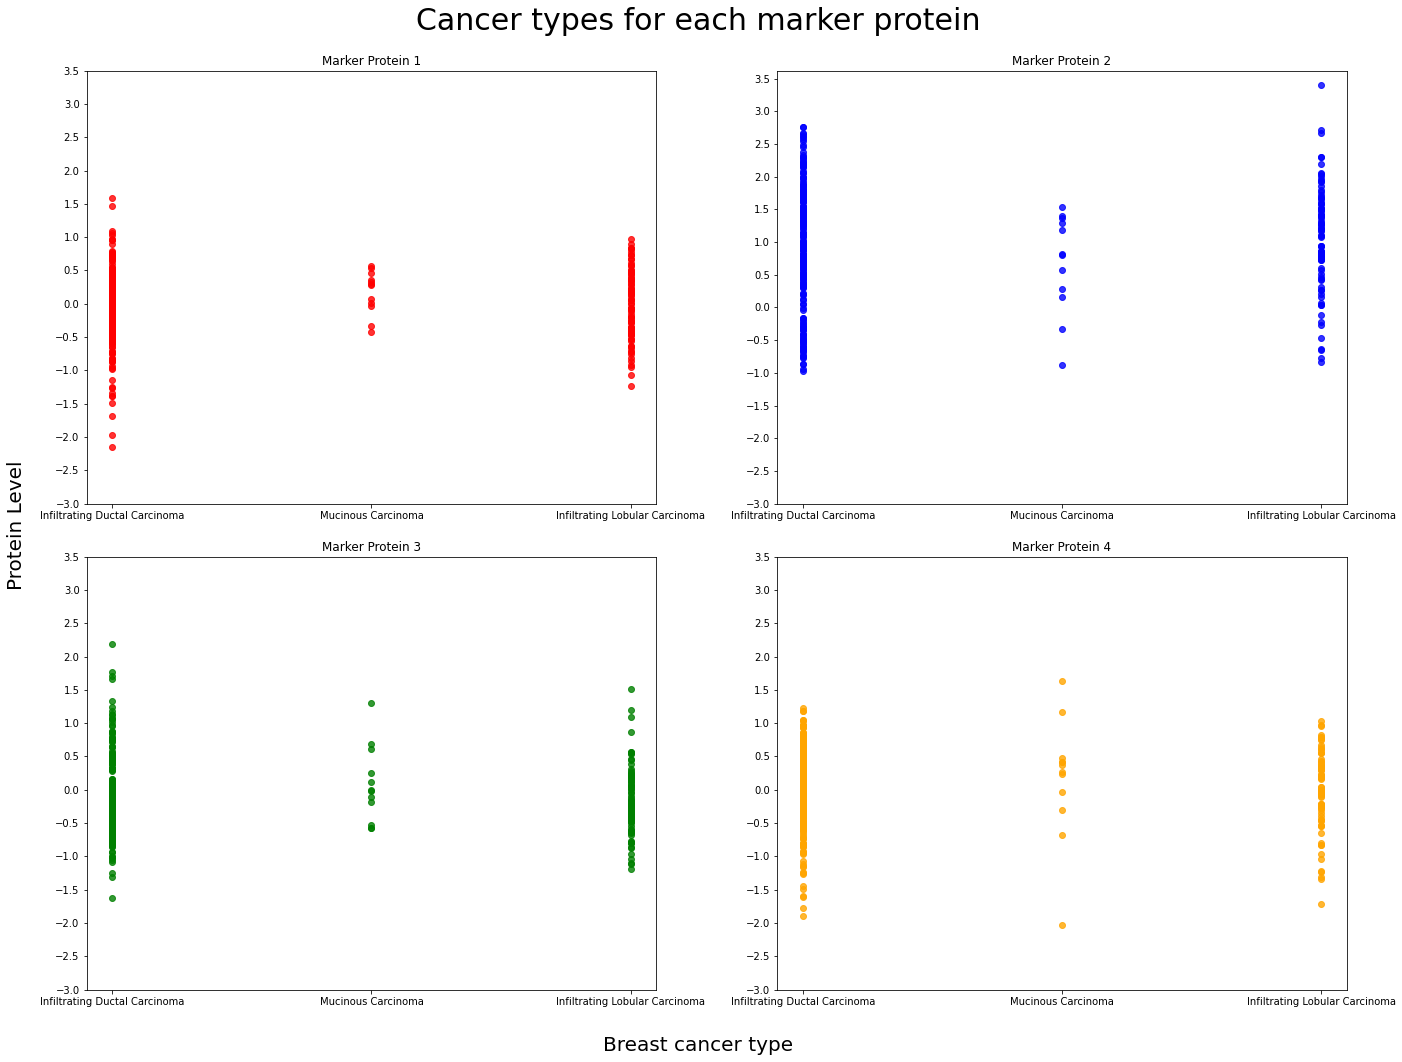

In [21]:
fig, axs = plt.subplots(2,2, figsize = (20,15))
axs[0,0].scatter(type_slices['Histology'], type_slices['Protein1'], color = color_list[0], alpha = 0.8)
axs[0,0].set_title('Marker Protein 1')
axs[0,0].set_yticks(np.arange(-3, 4, 0.5))
axs[0,1].scatter(type_slices['Histology'], type_slices['Protein2'], color = color_list[1], alpha = 0.8)
axs[0,1].set_title('Marker Protein 2')
axs[0,1].set_yticks(np.arange(-3, 4, 0.5))
axs[1,0].scatter(type_slices['Histology'], type_slices['Protein3'], color = color_list[2], alpha = 0.8)
axs[1,0].set_title('Marker Protein 3')
axs[1,0].set_yticks(np.arange(-3, 4, 0.5))
axs[1,1].scatter(type_slices['Histology'], type_slices['Protein4'], color = color_list[3], alpha = 0.8)
axs[1,1].set_title('Marker Protein 4')
axs[1,1].set_yticks(np.arange(-3, 4, 0.5))

plt.suptitle('Cancer types for each marker protein', fontsize = 30)
fig.supylabel('Protein Level', fontsize = 20)
fig.supxlabel('Breast cancer type', fontsize = 20)
plt.tight_layout(pad = 2)

plt.show()

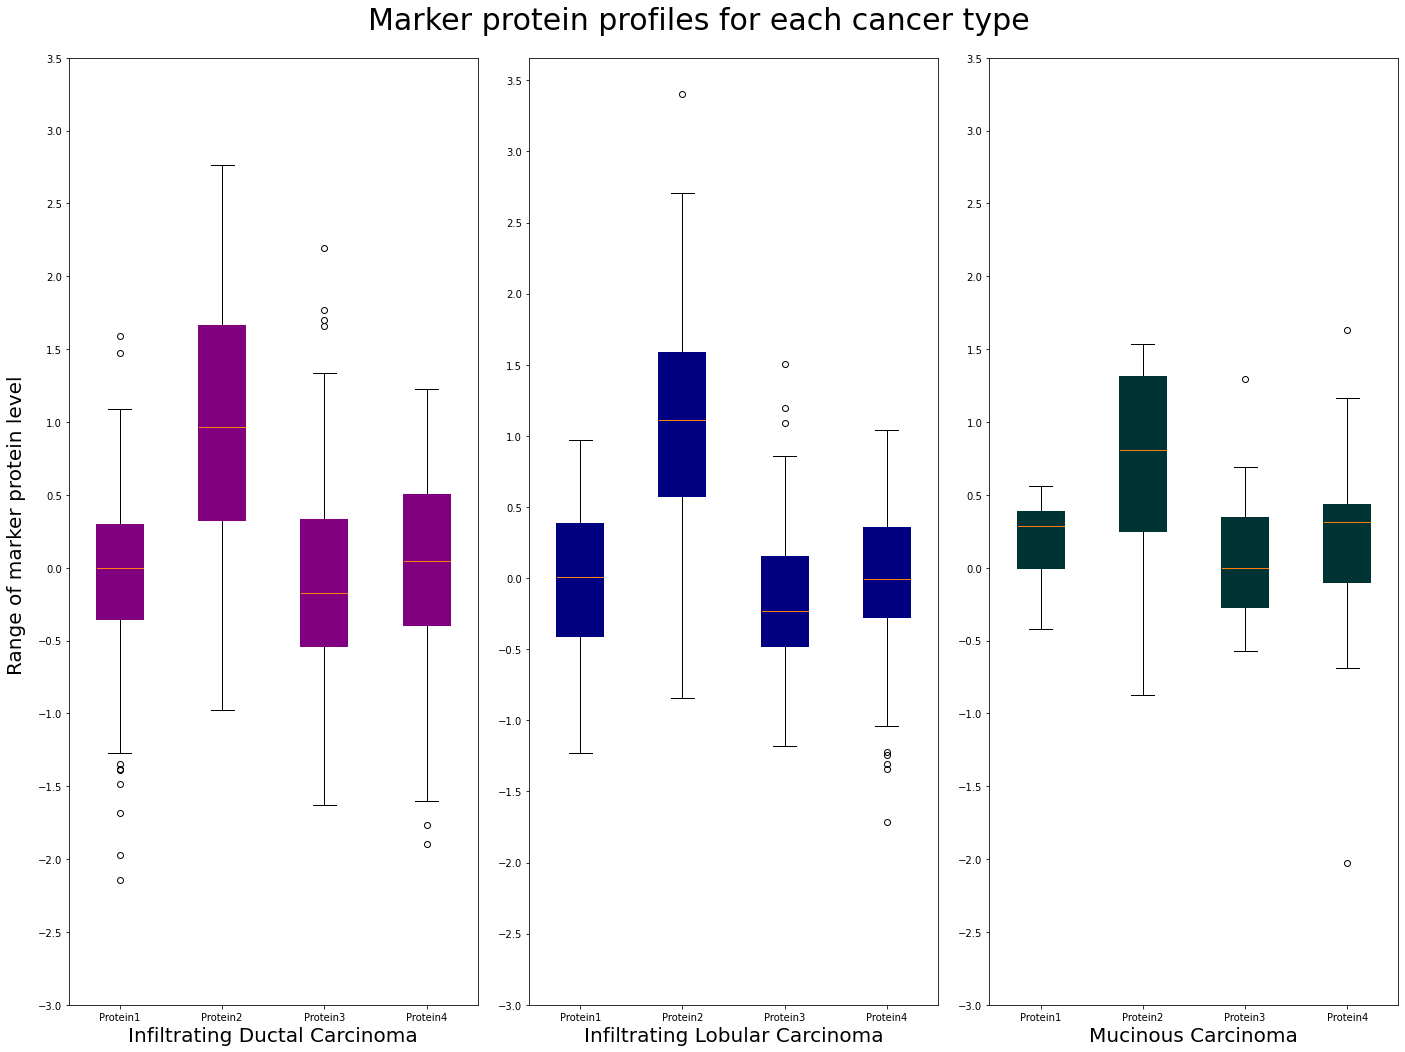

In [23]:
idc = type_slices.loc[type_slices['Histology'] == 'Infiltrating Ductal Carcinoma'][['Protein1','Protein2','Protein3','Protein4']]
ilc = type_slices.loc[type_slices['Histology'] == 'Infiltrating Lobular Carcinoma'][['Protein1','Protein2','Protein3','Protein4']]
mcc = type_slices.loc[type_slices['Histology'] == 'Mucinous Carcinoma'][['Protein1','Protein2','Protein3','Protein4']]

fig = plt.figure(figsize = (20,15))

plt.subplot(1,3,1)
idc_boxes = plt.boxplot([list(idc[t]) for t in idc], labels = list(idc.columns), patch_artist = True)

for box in idc_boxes['boxes']:
    box.set(color = '#800080', linewidth = 2)
    
    box.set(facecolor = '#800080')
plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Infiltrating Ductal Carcinoma', fontsize = 20)


plt.subplot(1,3,2)    
    
ilc_boxes = plt.boxplot([list(ilc[t]) for t in ilc], labels = list(ilc.columns), patch_artist = True)

for box in ilc_boxes['boxes']:
    box.set(color = '#000080', linewidth = 2)
    
    box.set(facecolor = '#000080')
plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Infiltrating Lobular Carcinoma', fontsize = 20)



plt.subplot(1,3,3)

mcc_boxes = plt.boxplot([list(mcc[t]) for t in mcc], labels = list(mcc.columns), patch_artist = True)

for box in mcc_boxes['boxes']:
    box.set(color = '#003333', linewidth = 2)
    
    box.set(facecolor = '#003333')
plt.yticks(np.arange(-3, 4, 0.5))
plt.xlabel('Mucinous Carcinoma', fontdict = {'fontsize':20})

fig.suptitle('Marker protein profiles for each cancer type', fontsize = 30)
fig.supylabel('Range of marker protein level', fontsize = 20)
fig.tight_layout(pad = 2)

plt.show()

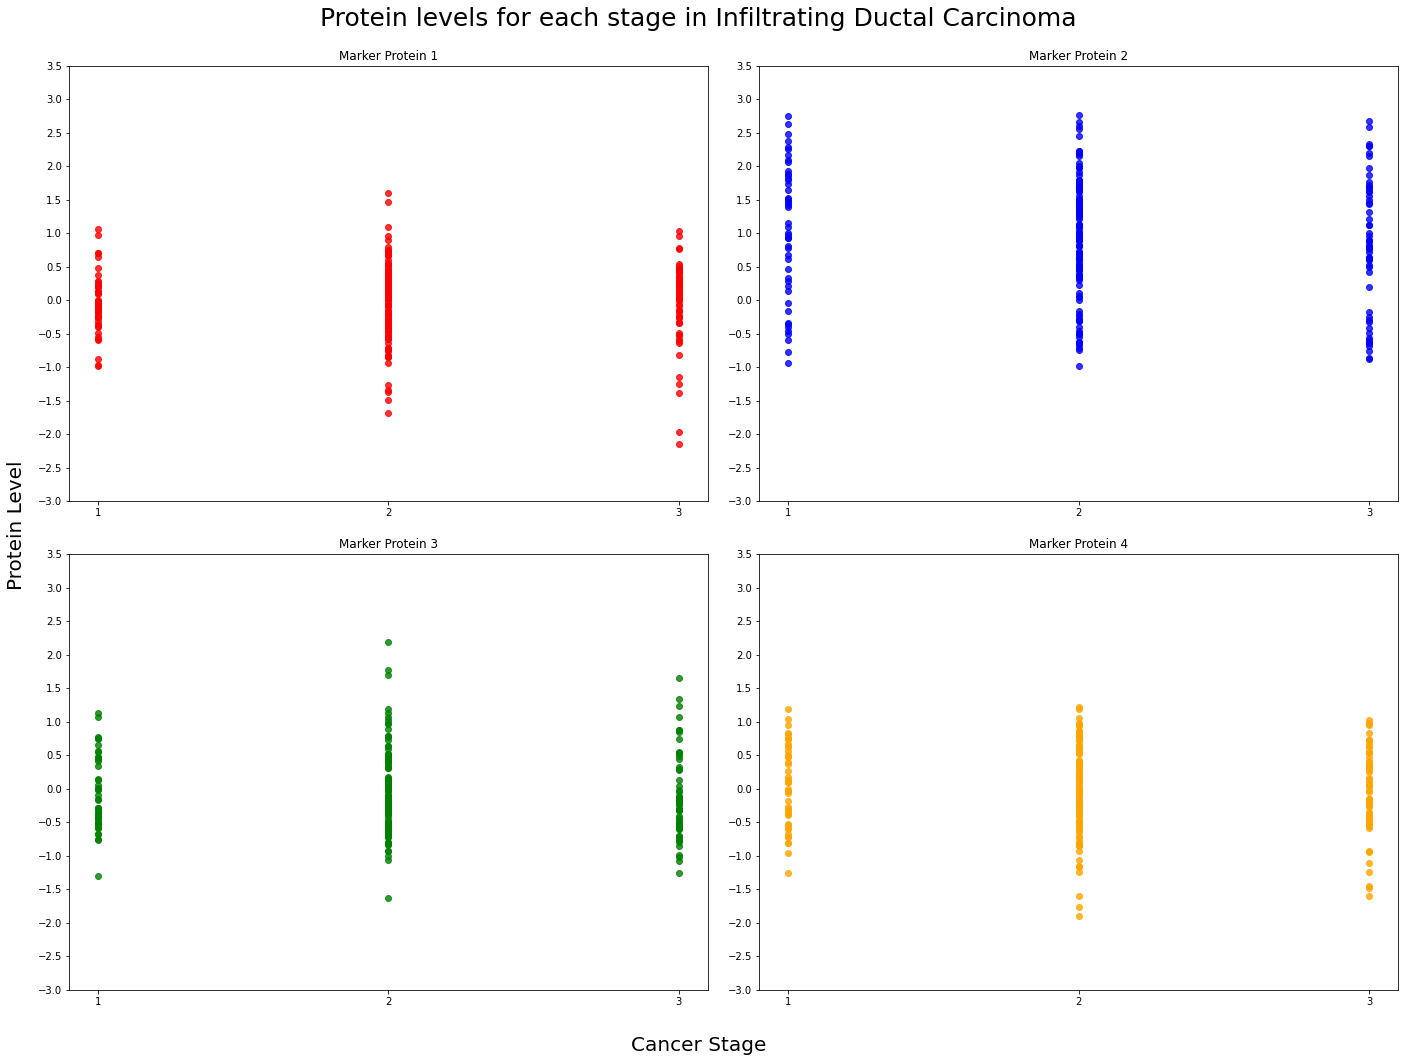

In [24]:
idc_l = brca.loc[brca['Histology'] == brca['Histology'].unique()[0]][['Tumour_Stage','Protein1', 'Protein2','Protein3','Protein4']]
mcc_l = brca.loc[brca['Histology'] == brca['Histology'].unique()[1]][['Tumour_Stage','Protein1', 'Protein2','Protein3','Protein4']]
ilc_l = brca.loc[brca['Histology'] == brca['Histology'].unique()[2]][['Tumour_Stage','Protein1', 'Protein2','Protein3','Protein4']]
idc_l['Tumour_Stage'] = [len(vi) for vi in idc_l['Tumour_Stage']]
ilc_l['Tumour_Stage'] = [len(vi) for vi in ilc_l['Tumour_Stage']]
mcc_l['Tumour_Stage'] = [len(vi) for vi in mcc_l['Tumour_Stage']]
labels = list(idc_l['Tumour_Stage'].unique())
fig, axs = plt.subplots(2,2, figsize = (20,15))
axs[0,0].scatter(idc_l['Tumour_Stage'],idc_l['Protein1'], color = color_list[0], alpha = 0.8)
axs[0,0].set_title('Marker Protein 1')
axs[0,0].set_xticks(labels)
axs[0,0].set_yticks(np.arange(-3, 4, 0.5))
axs[0,1].scatter(idc_l['Tumour_Stage'],idc_l['Protein2'], color = color_list[1], alpha = 0.8)
axs[0,1].set_title('Marker Protein 2')
axs[0,1].set_xticks(labels)
axs[0,1].set_yticks(np.arange(-3, 4, 0.5))
axs[1,0].scatter(idc_l['Tumour_Stage'],idc_l['Protein3'], color = color_list[2], alpha = 0.8)
axs[1,0].set_title('Marker Protein 3')
axs[1,0].set_xticks(labels)
axs[1,0].set_yticks(np.arange(-3, 4, 0.5))
axs[1,1].scatter(idc_l['Tumour_Stage'],idc_l['Protein4'], color = color_list[3], alpha = 0.8)
axs[1,1].set_title('Marker Protein 4')
axs[1,1].set_xticks(labels)
axs[1,1].set_yticks(np.arange(-3, 4, 0.5))


plt.suptitle('Protein levels for each stage in Infiltrating Ductal Carcinoma', fontsize = 25)
fig.supylabel('Protein Level', fontsize = 20)
fig.supxlabel('Cancer Stage', fontsize = 20)
plt.tight_layout(pad = 2)

plt.show()

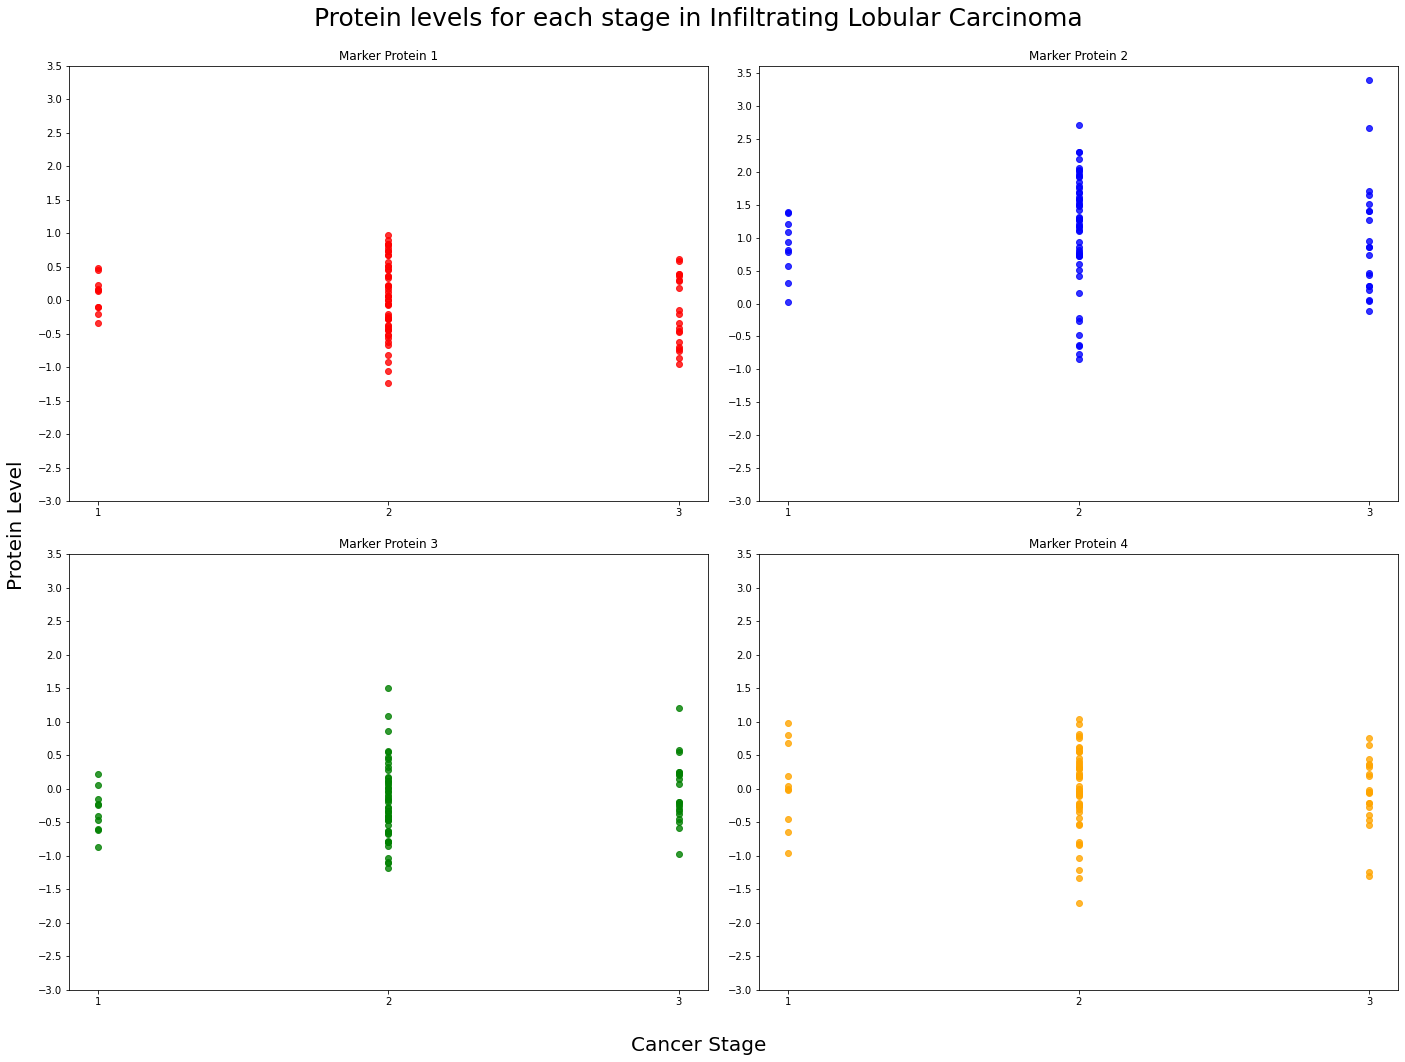

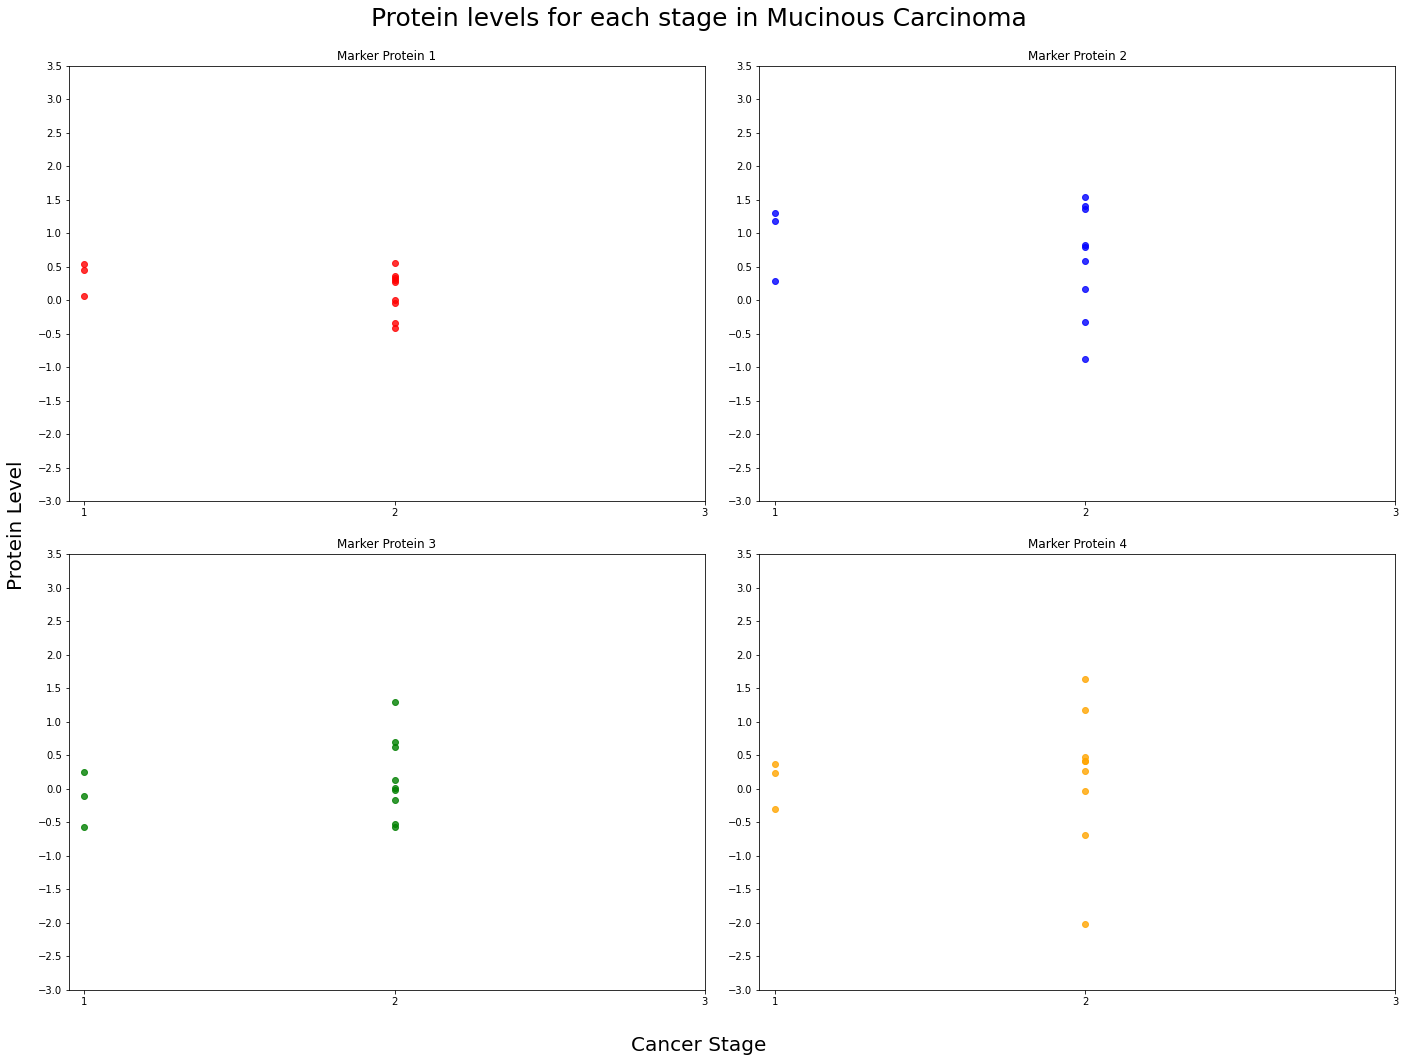

In [25]:
fig, axs = plt.subplots(2,2, figsize = (20,15))
axs[0,0].scatter(ilc_l['Tumour_Stage'],ilc_l['Protein1'], color = color_list[0], alpha = 0.8)
axs[0,0].set_title('Marker Protein 1')
axs[0,0].set_xticks(labels)
axs[0,0].set_yticks(np.arange(-3, 4, 0.5))
axs[0,1].scatter(ilc_l['Tumour_Stage'],ilc_l['Protein2'], color = color_list[1], alpha = 0.8)
axs[0,1].set_title('Marker Protein 2')
axs[0,1].set_xticks(labels)
axs[0,1].set_yticks(np.arange(-3, 4, 0.5))
axs[1,0].scatter(ilc_l['Tumour_Stage'],ilc_l['Protein3'], color = color_list[2], alpha = 0.8)
axs[1,0].set_title('Marker Protein 3')
axs[1,0].set_xticks(labels)
axs[1,0].set_yticks(np.arange(-3, 4, 0.5))
axs[1,1].scatter(ilc_l['Tumour_Stage'],ilc_l['Protein4'], color = color_list[3], alpha = 0.8)
axs[1,1].set_title('Marker Protein 4')
axs[1,1].set_xticks(labels)
axs[1,1].set_yticks(np.arange(-3, 4, 0.5))


plt.suptitle('Protein levels for each stage in Infiltrating Lobular Carcinoma', fontsize = 25)
fig.supylabel('Protein Level', fontsize = 20)
fig.supxlabel('Cancer Stage', fontsize = 20)
plt.tight_layout(pad = 2)

plt.show()

fig, axs = plt.subplots(2,2, figsize = (20,15))
axs[0,0].scatter(mcc_l['Tumour_Stage'],mcc_l['Protein1'], color = color_list[0], alpha = 0.8)
axs[0,0].set_title('Marker Protein 1')
axs[0,0].set_xticks(labels)
axs[0,0].set_yticks(np.arange(-3, 4, 0.5))
axs[0,1].scatter(mcc_l['Tumour_Stage'],mcc_l['Protein2'], color = color_list[1], alpha = 0.8)
axs[0,1].set_title('Marker Protein 2')
axs[0,1].set_xticks(labels)
axs[0,1].set_yticks(np.arange(-3, 4, 0.5))
axs[1,0].scatter(mcc_l['Tumour_Stage'],mcc_l['Protein3'], color = color_list[2], alpha = 0.8)
axs[1,0].set_title('Marker Protein 3')
axs[1,0].set_xticks(labels)
axs[1,0].set_yticks(np.arange(-3, 4, 0.5))
axs[1,1].scatter(mcc_l['Tumour_Stage'],mcc_l['Protein4'], color = color_list[3], alpha = 0.8)
axs[1,1].set_title('Marker Protein 4')
axs[1,1].set_xticks(labels)
axs[1,1].set_yticks(np.arange(-3, 4, 0.5))


plt.suptitle('Protein levels for each stage in Mucinous Carcinoma', fontsize = 25)
fig.supylabel('Protein Level', fontsize = 20)
fig.supxlabel('Cancer Stage', fontsize = 20)
plt.tight_layout(pad = 2)

plt.show()

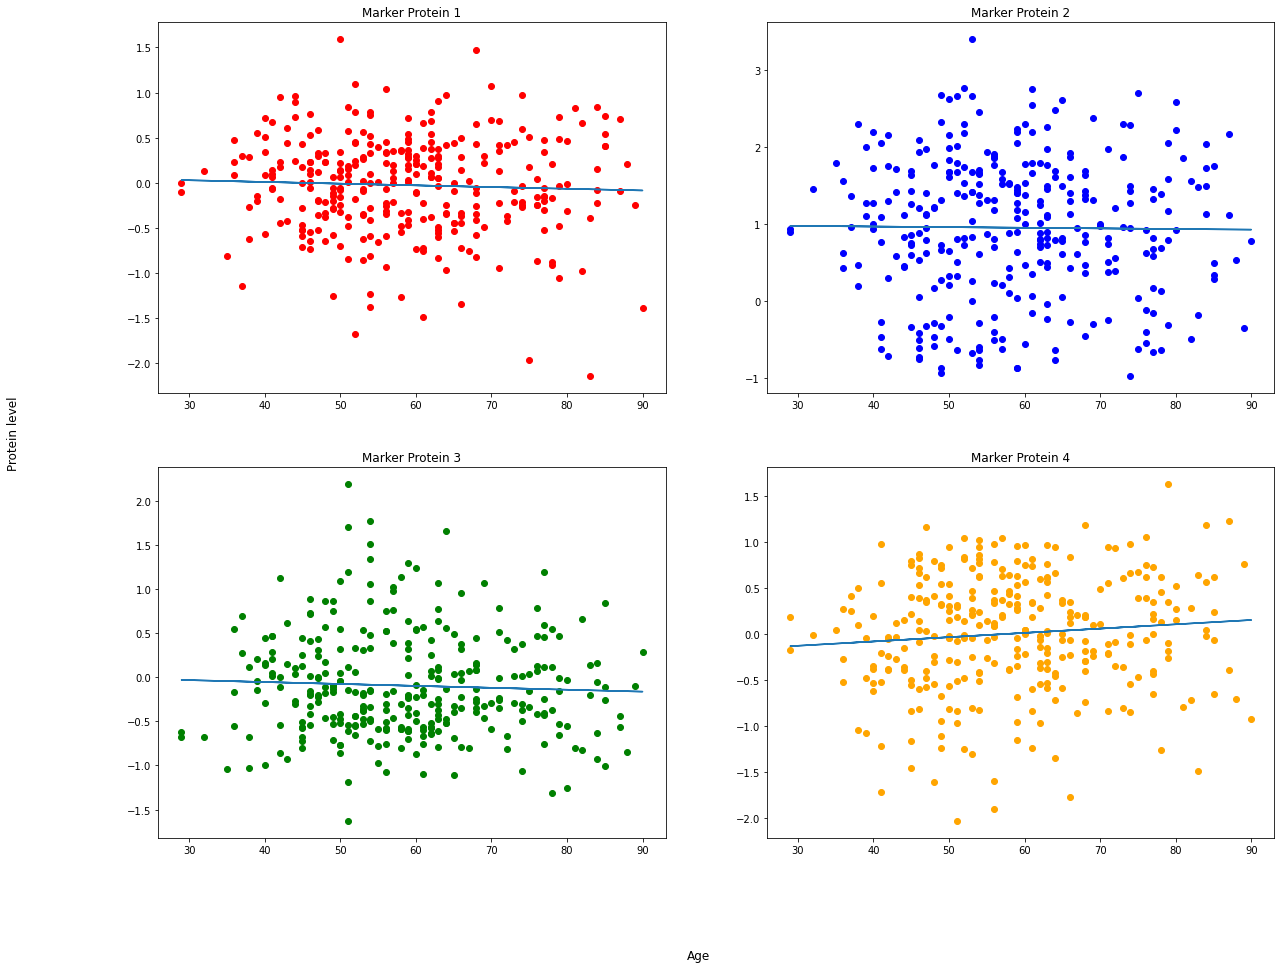

In [26]:
fig, axs = plt.subplots(2,2, figsize = (20,15))
axs[0,0].scatter(brca['Age'], brca['Protein1'], color = color_list[0])
m, b = np.polyfit(brca['Age'], brca['Protein1'],1)
axs[0,0].plot(brca['Age'], m * brca['Age'] + b)
axs[0,0].set_title('Marker Protein 1')

axs[0,1].scatter(brca['Age'], brca['Protein2'], color = color_list[1])
m, b = np.polyfit(brca['Age'], brca['Protein2'],1)
axs[0,1].plot(brca['Age'], m * brca['Age'] + b)
axs[0,1].set_title('Marker Protein 2')

axs[1,0].scatter(brca['Age'], brca['Protein3'], color = color_list[2])
m, b = np.polyfit(brca['Age'], brca['Protein3'],1)
axs[1,0].plot(brca['Age'], m * brca['Age'] + b)
axs[1,0].set_title('Marker Protein 3')

axs[1,1].scatter(brca['Age'], brca['Protein4'], color = color_list[3])
m, b = np.polyfit(brca['Age'], brca['Protein4'],1)
axs[1,1].plot(brca['Age'], m * brca['Age'] + b)
axs[1,1].set_title('Marker Protein 4')

fig.supxlabel('Age')
fig.supylabel('Protein level')
plt.show()

In [27]:
n_markers = brca[['Histology', 'ER status', 'PR status', 'HER2 status']]

In [28]:
n_markers.loc[n_markers['ER status'] == 'Positive'].count()

Histology      317
ER status      317
PR status      317
HER2 status    317
dtype: int64

In [29]:
n_markers.loc[n_markers['PR status'] == 'Positive'].count()

Histology      317
ER status      317
PR status      317
HER2 status    317
dtype: int64

In [30]:
n_markers.loc[n_markers['HER2 status'] == 'Positive'].count()

Histology      29
ER status      29
PR status      29
HER2 status    29
dtype: int64

In [31]:
n_markers.loc[n_markers['HER2 status'] == 'Negative'].count()

Histology      288
ER status      288
PR status      288
HER2 status    288
dtype: int64

In [32]:
brca.groupby('HER2 status', as_index = False).agg(Total =('Age', 'count'))

,HER2 status,Total
0,Negative,288
1,Positive,29


In [33]:
her2_alive = brca.loc[brca['Patient_Status'] == 'Alive'][['Age', 'Tumour_Stage', 'Histology', 'HER2 status']]
her2_dead = brca.loc[brca['Patient_Status'] == 'Dead'][['Age', 'Tumour_Stage', 'Histology', 'HER2 status']]
alive_stat = her2_alive.groupby('HER2 status', as_index = False)['Age'].count()
dead_stat = her2_dead.groupby('HER2 status', as_index = False)['Age'].count()
alive_stat  

,HER2 status,Age
0,Negative,230
1,Positive,25


In [34]:
dead_stat

,HER2 status,Age
0,Negative,58
1,Positive,4


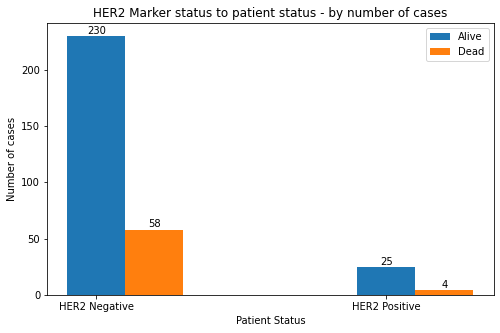

In [35]:
vari = ['HER2 Negative', 'HER2 Positive']
x = np.arange(len(vari))
cur_width = 0.2

fig, ax = plt.subplots(figsize = (8, 5))

pos_ax = ax.bar(x, alive_stat['Age'], width = cur_width, label = 'Alive')
neg_ax = ax.bar(x + width, dead_stat['Age'], width = cur_width, label = 'Dead')

ax.bar_label(pos_ax, padding = 0.3)
ax.bar_label(neg_ax, padding = 0.3)

ax.set_xticks(x)
ax.set_xticklabels(vari)
ax.set_yticks(np.arange(0,250,50))

plt.xlabel('Patient Status')
plt.ylabel('Number of cases')
plt.title('HER2 Marker status to patient status - by number of cases')
plt.legend()
plt.show()

In [36]:
alive_stat['Ratio'] = 0
dead_stat['Ratio'] = 0

alive_stat.iloc[1,2] = alive_stat.iloc[1,1] / (alive_stat.iloc[1,1] + dead_stat.iloc[1,1])
dead_stat.iloc[1,2] = dead_stat.iloc[1,1] / (alive_stat.iloc[1,1] + dead_stat.iloc[1,1])
alive_stat.iloc[0,2] = alive_stat.iloc[0,1] / (alive_stat.iloc[0,1] + dead_stat.iloc[0,1])
dead_stat.iloc[0,2] = dead_stat.iloc[0,1] / (alive_stat.iloc[0,1] + dead_stat.iloc[0,1])
alive_stat

,HER2 status,Age,Ratio
0,Negative,230,0.798611
1,Positive,25,0.862069


In [37]:
dead_stat

,HER2 status,Age,Ratio
0,Negative,58,0.201389
1,Positive,4,0.137931


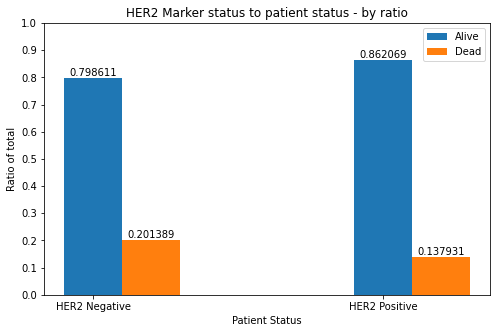

In [38]:
vari = ['HER2 Negative', 'HER2 Positive']
x = np.arange(len(vari))
cur_width = 0.2

fig, ax = plt.subplots(figsize = (8, 5))

pos_ax = ax.bar(x, alive_stat['Ratio'], width = cur_width, label = 'Alive')
neg_ax = ax.bar(x + width, dead_stat['Ratio'], width = cur_width, label = 'Dead')

ax.bar_label(pos_ax, padding = 0.3)
ax.bar_label(neg_ax, padding = 0.3)

ax.set_xticks(x)
ax.set_xticklabels(vari)
ax.set_yticks(np.arange(0,1.1,0.1))

plt.xlabel('Patient Status')
plt.ylabel('Ratio of total')
plt.title('HER2 Marker status to patient status - by ratio')
plt.legend()
plt.show()

In [39]:
cancer_mort_raw = {}
key = 0
for i in range(len(bins)):
    if i < len(bins) - 1:
        row = brca.loc[(brca['Age'] >= bins[i]) & (brca['Age'] < bins[i + 1])][['Patient_Status', 'Age']]
        if row.empty is False:
            cancer_mort_raw.update({'{} to {}'.format(bins[i], bins[i + 1]):row })
            key += 1
    else:
        pass

cancer_mort_list = []

for key, val in cancer_mort_raw.items():
    age_range = key
    status_df = val.groupby('Patient_Status', as_index = False).count()
    status_vals = {}
    
    for ps, a in zip(status_df['Patient_Status'], status_df['Age']):
        status_vals.update({'Age_range': age_range, ps: a})
        
    cancer_mort_list.append(status_vals)
cancer_mort = pd.DataFrame(cancer_mort_list)
cancer_mort.fillna(0, inplace = True)
cancer_mort.head()

,Age_range,Alive,Dead
0,25 to 30,1.0,1.0
1,30 to 35,0.0,1.0
2,35 to 40,11.0,1.0
3,40 to 45,20.0,3.0
4,45 to 50,33.0,11.0


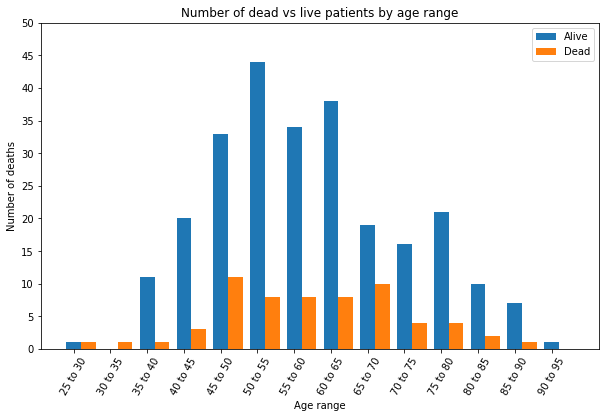

In [40]:
fig = plt.figure(figsize = (10,6))

age_range = list(cancer_mort['Age_range'])
x = np.arange(len(age_range))
width = 0.4

plt.bar(x, cancer_mort['Alive'], width = width, label = 'Alive')
plt.bar(x + width, cancer_mort['Dead'], width = width, label = 'Dead')
plt.xticks(x, rotation = 60, labels = age_range)
plt.yticks(np.arange(0, 55, 5))
plt.title('Number of dead vs live patients by age range')
plt.xlabel('Age range')
plt.ylabel('Number of deaths')

plt.legend()
plt.show()

In [41]:
cancer_types = (
    brca
    .groupby(['Histology', 'Patient_Status'], as_index = False)
    .agg(Total = ('Age', 'count'))
)
cancer_types

,Histology,Patient_Status,Total
0,Infiltrating Ductal Carcinoma,Alive,179
1,Infiltrating Ductal Carcinoma,Dead,45
2,Infiltrating Lobular Carcinoma,Alive,67
3,Infiltrating Lobular Carcinoma,Dead,14
4,Mucinous Carcinoma,Alive,9
5,Mucinous Carcinoma,Dead,3


In [42]:
total_lesions = cancer_types_total['Total_Number'].sum()

ratios_by_type = []
ratios_by_total = []
for hist, pat_total in zip(cancer_types_total['Histology'], cancer_types_total['Total_Number']):
    results = cancer_types.loc[cancer_types['Histology'] == hist]
    
    for result in results['Total']:
        ratio_by_type = (result/pat_total)*100
        ratios_by_type.append(ratio_by_type)
        
        ratio_by_total = (result/total_lesions)*100
        ratios_by_total.append(ratio_by_total)
cancer_types['Ratio by cancer type (%)'] = ratios_by_type
cancer_types['Ratio by total (%)'] = ratios_by_total
cancer_types

,Histology,Patient_Status,Total,Ratio by cancer type (%),Ratio by total (%)
0,Infiltrating Ductal Carcinoma,Alive,179,79.910714,56.466877
1,Infiltrating Ductal Carcinoma,Dead,45,20.089286,14.195584
2,Infiltrating Lobular Carcinoma,Alive,67,82.716049,21.135647
3,Infiltrating Lobular Carcinoma,Dead,14,17.283951,4.416404
4,Mucinous Carcinoma,Alive,9,75.000000,2.839117
5,Mucinous Carcinoma,Dead,3,25.000000,0.946372


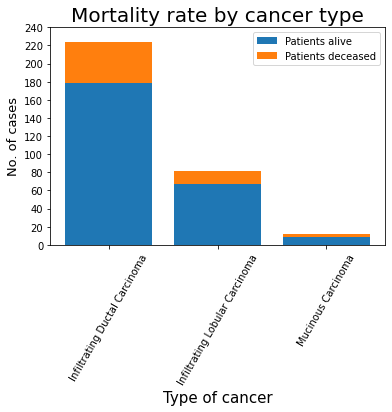

In [43]:
cancer_types_alive = cancer_types.loc[cancer_types['Patient_Status'] == 'Alive'].copy()
cancer_types_dead = cancer_types.loc[cancer_types['Patient_Status'] == 'Dead'].copy()
cancer_types_alive.reset_index(inplace = True)
cancer_types_alive.drop('index', axis = 1, inplace = True)

cancer_types_dead.reset_index(inplace = True)
cancer_types_dead.drop('index', axis = 1, inplace = True)
plt.bar(cancer_types_alive['Histology'], cancer_types_alive['Total'], label = 'Patients alive')
plt.bar(cancer_types_dead['Histology'], cancer_types_dead['Total'], bottom = cancer_types_alive['Total'], label = 'Patients deceased')

plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 250, 20))
plt.ylabel('No. of cases', fontdict={'fontsize': 13})
plt.xlabel('Type of cancer', fontdict={'fontsize': 15})
plt.title('Mortality rate by cancer type', fontdict={'fontsize': 20})
plt.legend()

plt.show()

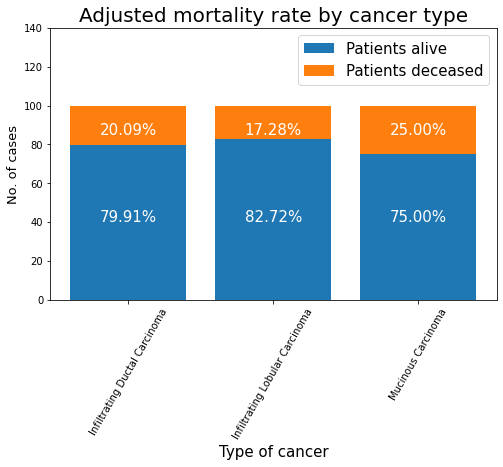

In [44]:
plt.figure(figsize = (8, 5))
counter = 0

plt.bar(cancer_types_alive['Histology'], cancer_types_alive['Ratio by cancer type (%)'], label = 'Patients alive')

for ind, value in zip(cancer_types_alive.index, cancer_types_alive['Ratio by cancer type (%)']):
    plt.text(ind, 40, '{:.2f}%'.format(value), horizontalalignment='center', fontdict={'fontsize': 15, 'color':'white'})

plt.bar(cancer_types_dead['Histology'], cancer_types_dead['Ratio by cancer type (%)'], bottom = cancer_types_alive['Ratio by cancer type (%)'], label = 'Patients deceased')

for ind, value in zip(cancer_types_dead.index, cancer_types_dead['Ratio by cancer type (%)']):
    plt.text(ind, 85, '{:.2f}%'.format(value), horizontalalignment='center', fontdict={'fontsize': 15, 'color':'white'})

plt.xticks(rotation = 60)
plt.yticks(np.arange(0, 150, 20))
plt.ylabel('No. of cases', fontdict={'fontsize': 13})
plt.xlabel('Type of cancer', fontdict={'fontsize': 15})
plt.title('Adjusted mortality rate by cancer type', fontdict={'fontsize': 20})


plt.legend(prop = {'size': 15})

plt.show()

In [45]:
cancer_stage_raw = {}
c_types = list(brca['Histology'].unique())

for ty in c_types:
    row = brca.loc[(brca['Histology'] == ty)][['Tumour_Stage','Patient_Status', 'Age']]
    
    cancer_stage_raw.update({'{}'.format(ty):row })
labels = ['Alive', 'Dead']

kidc, vidc = list(cancer_stage_raw.keys())[0], list(cancer_stage_raw.values())[0]
kmcc, vmcc = list(cancer_stage_raw.keys())[1], list(cancer_stage_raw.values())[1]
kilc, vilc = list(cancer_stage_raw.keys())[2], list(cancer_stage_raw.values())[2]

In [46]:
idc_i_i = vidc.loc[vidc['Tumour_Stage'] == 'I'][['Patient_Status', 'Age']]
idc_i_f = idc_i_i.groupby('Patient_Status', as_index = False).count()

idc_ii_i = vidc.loc[vidc['Tumour_Stage'] == 'II'][['Patient_Status', 'Age']]
idc_ii_f = idc_ii_i.groupby('Patient_Status', as_index = False).count()

idc_iii_i = vidc.loc[vidc['Tumour_Stage'] == 'III'][['Patient_Status', 'Age']]
idc_iii_f = idc_iii_i.groupby('Patient_Status', as_index = False).count()

ilc_i_i = vilc.loc[vilc['Tumour_Stage'] == 'I'][['Patient_Status', 'Age']]
ilc_i_f = ilc_i_i.groupby('Patient_Status', as_index = False).count()

ilc_ii_i = vilc.loc[vilc['Tumour_Stage'] == 'II'][['Patient_Status', 'Age']]
ilc_ii_f = ilc_ii_i.groupby('Patient_Status', as_index = False).count()

ilc_iii_i = vilc.loc[vilc['Tumour_Stage'] == 'III'][['Patient_Status', 'Age']]
ilc_iii_f = ilc_iii_i.groupby('Patient_Status', as_index = False).count()

mcc_i_i = vmcc.loc[vmcc['Tumour_Stage'] == 'I'][['Patient_Status', 'Age']]
mcc_i_f = mcc_i_i.groupby('Patient_Status', as_index = False).count()

mcc_ii_i = vmcc.loc[vmcc['Tumour_Stage'] == 'II'][['Patient_Status', 'Age']]
mcc_ii_f = mcc_ii_i.groupby('Patient_Status', as_index = False).count()

mcc_iii_i = vmcc.loc[vmcc['Tumour_Stage'] == 'III'][['Patient_Status', 'Age']]
mcc_iii_f = mcc_iii_i.groupby('Patient_Status', as_index = False).count()

mcc_i_f = mcc_i_f.append({'Patient_Status':'Dead','Age':0}, ignore_index = True)

idc_i_f['Percentage'] = (idc_i_f['Age']/idc_i_f['Age'].sum())*100
ilc_i_f['Percentage'] = (ilc_i_f['Age']/ilc_i_f['Age'].sum())*100
mcc_i_f['Percentage'] = (mcc_i_f['Age']/mcc_i_f['Age'].sum())*100

idc_ii_f['Percentage'] = (idc_ii_f['Age']/idc_ii_f['Age'].sum())*100
ilc_ii_f['Percentage'] = (ilc_ii_f['Age']/ilc_ii_f['Age'].sum())*100
mcc_ii_f['Percentage'] = (mcc_ii_f['Age']/mcc_ii_f['Age'].sum())*100

idc_iii_f['Percentage'] = (idc_iii_f['Age']/idc_iii_f['Age'].sum())*100
ilc_iii_f['Percentage'] = (ilc_iii_f['Age']/ilc_iii_f['Age'].sum())*100
mcc_iii_f['Percentage'] = (mcc_iii_f['Age']/mcc_iii_f['Age'].sum())*100

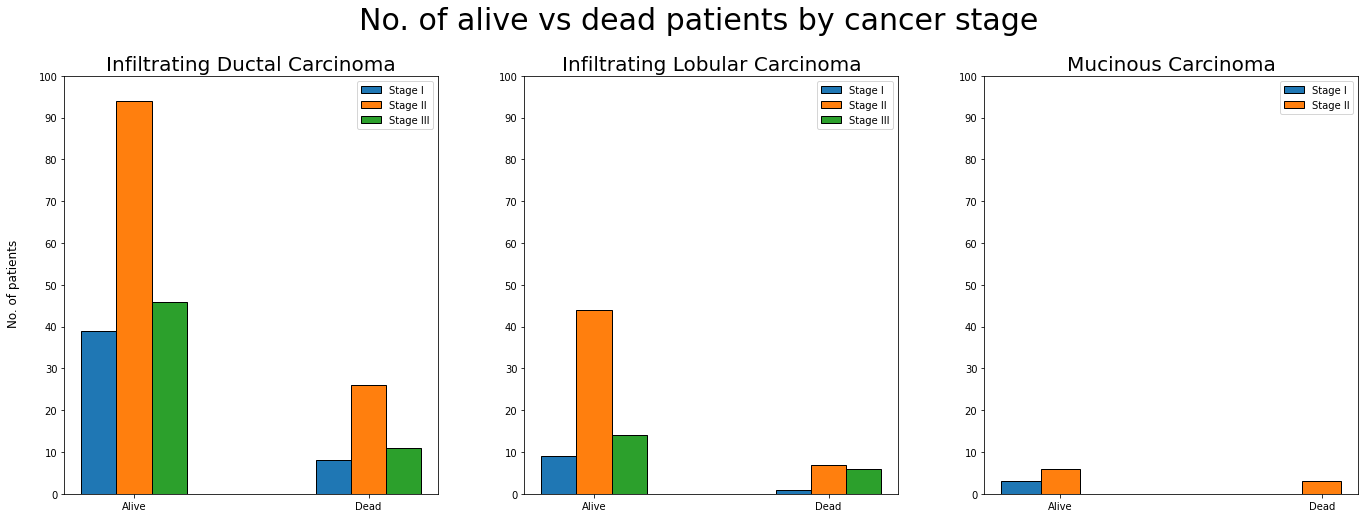

In [47]:
x = np.arange(len(labels))
width = 0.15
fig = plt.figure(figsize = (20,8))

fig1 = fig.add_subplot(1,3,1)
fig1.bar(x - width, idc_i_f['Age'], width = width, label = 'Stage I', edgecolor = 'black')
fig1.bar(x, idc_ii_f['Age'], width = width, label = 'Stage II', edgecolor = 'black')
fig1.bar(x + width, idc_iii_f['Age'], width = width, label = 'Stage III', edgecolor = 'black')
fig1.set_yticks(np.arange(0, 110,10))
fig1.set_xticks(x)
fig1.set_xticklabels(labels)
fig1.set_title('Infiltrating Ductal Carcinoma', fontdict = {'fontsize': 20})
fig1.legend()

fig2 = fig.add_subplot(1,3,2)
fig2.bar(x - width, ilc_i_f['Age'], width = width, label = 'Stage I', edgecolor = 'black')
fig2.bar(x, ilc_ii_f['Age'], width = width, label = 'Stage II', edgecolor = 'black')
fig2.bar(x + width, ilc_iii_f['Age'], width = width, label = 'Stage III', edgecolor = 'black')
fig2.set_yticks(np.arange(0, 110,10))
fig2.set_xticks(x)
fig2.set_xticklabels(labels)
fig2.set_title('Infiltrating Lobular Carcinoma', fontdict = {'fontsize': 20})
fig2.legend()

fig3 = fig.add_subplot(1,3,3)
fig3.bar(x - width, mcc_i_f['Age'], width = width, label = 'Stage I', edgecolor = 'black')
fig3.bar(x, mcc_ii_f['Age'], width = width, label = 'Stage II', edgecolor = 'black')
fig3.set_yticks(np.arange(0, 110,10))
fig3.set_xticks(x)
fig3.set_xticklabels(labels)
fig3.set_title('Mucinous Carcinoma', fontdict = {'fontsize': 20})
fig3.legend()

fig.tight_layout(pad = 6)
fig.supylabel('No. of patients')
fig.suptitle('No. of alive vs dead patients by cancer stage', fontsize = 30)
plt.show()

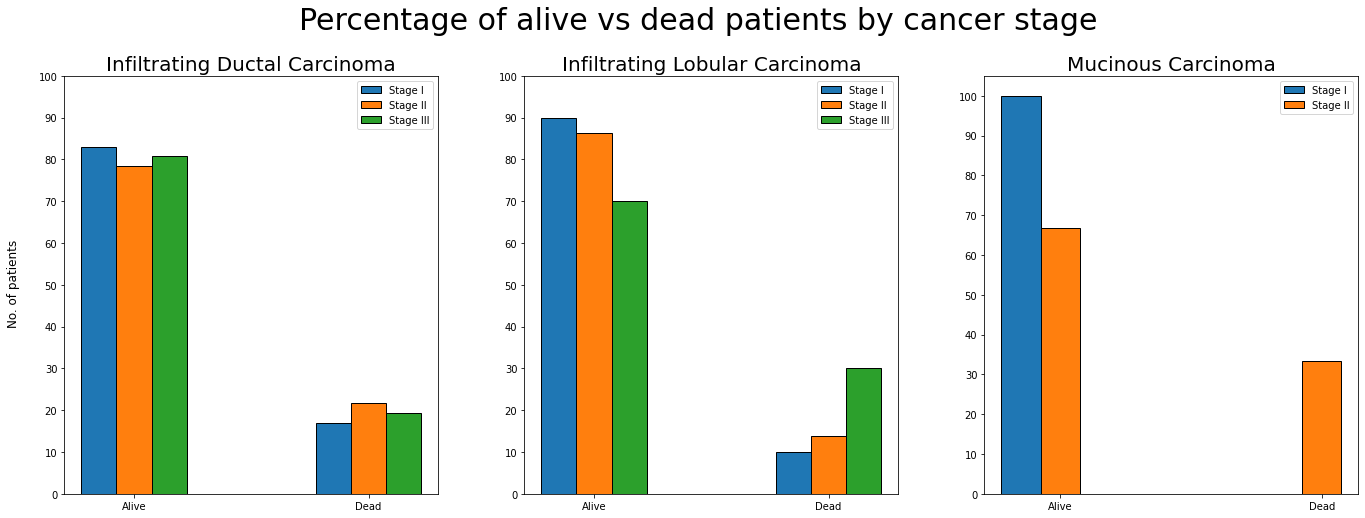

In [48]:
fig = plt.figure(figsize = (20,8))

fig1 = fig.add_subplot(1,3,1)
fig1.bar(x - width, idc_i_f['Percentage'], width = width, label = 'Stage I', edgecolor = 'black')
fig1.bar(x, idc_ii_f['Percentage'], width = width, label = 'Stage II', edgecolor = 'black')
fig1.bar(x + width, idc_iii_f['Percentage'], width = width, label = 'Stage III', edgecolor = 'black')
fig1.set_yticks(np.arange(0,110,10))
fig1.set_xticks(x)
fig1.set_xticklabels(labels)
fig1.set_title('Infiltrating Ductal Carcinoma', fontdict = {'fontsize': 20})
fig1.legend()

fig2 = fig.add_subplot(1,3,2)
fig2.bar(x - width, ilc_i_f['Percentage'], width = width, label = 'Stage I', edgecolor = 'black')
fig2.bar(x, ilc_ii_f['Percentage'], width = width, label = 'Stage II', edgecolor = 'black')
fig2.bar(x + width, ilc_iii_f['Percentage'], width = width, label = 'Stage III', edgecolor = 'black')
fig2.set_yticks(np.arange(0,110,10))
fig2.set_xticks(x)
fig2.set_xticklabels(labels)
fig2.set_title('Infiltrating Lobular Carcinoma', fontdict = {'fontsize': 20})
fig2.legend()

fig3 = fig.add_subplot(1,3,3)
fig3.bar(x - width, mcc_i_f['Percentage'], width = width, label = 'Stage I', edgecolor = 'black')
fig3.bar(x, mcc_ii_f['Percentage'], width = width, label = 'Stage II', edgecolor = 'black')
fig3.set_yticks(np.arange(0,110,10))
fig3.set_xticks(x)
fig3.set_xticklabels(labels)
fig3.set_title('Mucinous Carcinoma', fontdict = {'fontsize': 20})
fig3.legend()

fig.tight_layout(pad = 6)
fig.supylabel('No. of patients')
fig.suptitle('Percentage of alive vs dead patients by cancer stage', fontsize = 30)
plt.show()